In [1]:
import wandb
import numpy as np
from activations import Sigmoid, Tanh, Relu, Softmax
from layers import Input, Dense
from optimizers import Momentum, Nesterov, AdaGrad, RMSProp, Adam, Nadam
from layers import Input, Dense
from network import NeuralNetwork
from loss import CrossEntropy
from helper import OneHotEncoder, MinMaxScaler

from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [2]:
# Preparing small dataset to test the code
[(x_train, y_train), (x_test, y_test)] = fashion_mnist.load_data()
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x_train)
X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1]*X_scaled.shape[2]).T

encoder = OneHotEncoder()
t = encoder.fit_transform(y_train, 10)

In [3]:
layers = [Input(data=X_scaled), Dense(size=64, activation="Sigmoid", name="HL1"), Dense(size=10, activation="Sigmoid", name="OL")]
model = NeuralNetwork(layers=layers, batch_size=60000, optimizer="Adam", intialization="XavierUniform", epochs=100, t=t)
model.forward_propogation()
print("Number Correctly classified in untrained network:", np.sum(np.argmax(model.layers[-1].y, axis=0) == y_train))
model.backward_propogation()

(784, 60000)


  0%|          | 0/100 [00:00<?, ?it/s]

Nuber Correctly classified in untrained network: 4823


 40%|████      | 40/100 [00:28<00:42,  1.42it/s]

Early Stopping


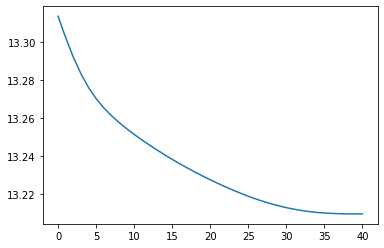

In [4]:
plt.plot(np.array(model.loss_hist)/X_scaled.shape[1])

In [5]:
np.min(model.loss_hist)/X_scaled.shape[1], np.max(model.loss_hist)/X_scaled.shape[1]

(13.20933684644041, 13.313823792893661)

In [6]:
np.sum(np.argmax(model.layers[-1].y, axis=0) == y_train)

24798